In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [59]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


2024-08-08 14:02:15.132245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 14:02:17.048077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


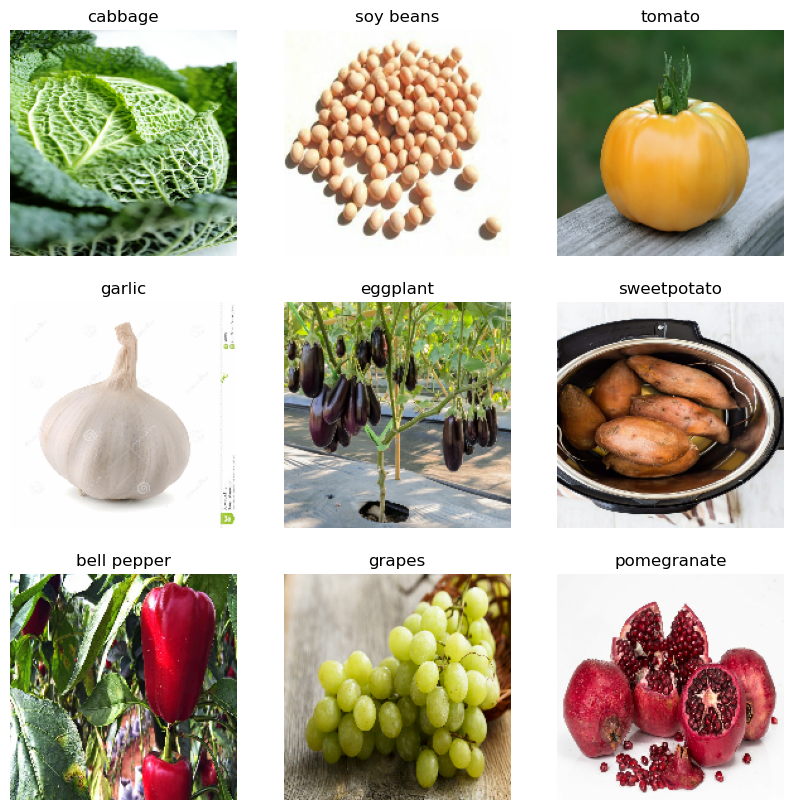

In [37]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [17]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


2024-08-08 12:41:54.046119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 55s 600ms/step - accuracy: 0.0347 - loss: 3.8964

2024-08-08 12:41:57.557168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 53s 581ms/step - accuracy: 0.0332 - loss: 3.8979

2024-08-08 12:41:58.338540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 51s 570ms/step - accuracy: 0.0330 - loss: 3.8933

2024-08-08 12:41:58.626548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 49s 556ms/step - accuracy: 0.0342 - loss: 3.8761

2024-08-08 12:41:59.439719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 48s 548ms/step - accuracy: 0.0351 - loss: 3.8655

2024-08-08 12:41:59.890623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 46s 541ms/step - accuracy: 0.0376 - loss: 3.8431

2024-08-08 12:42:01.335521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 45s 558ms/step - accuracy: 0.0440 - loss: 3.8003

2024-08-08 12:42:03.668627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 44s 554ms/step - accuracy: 0.0453 - loss: 3.7899

2024-08-08 12:42:04.242653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 45s 574ms/step - accuracy: 0.0466 - loss: 3.7796

2024-08-08 12:42:05.194511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 44s 574ms/step - accuracy: 0.0491 - loss: 3.7606

2024-08-08 12:42:06.164488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 43s 576ms/step - accuracy: 0.0512 - loss: 3.7422

2024-08-08 12:42:07.247997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 40s 575ms/step - accuracy: 0.0562 - loss: 3.6996

2024-08-08 12:42:10.362528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 40s 574ms/step - accuracy: 0.0571 - loss: 3.6915

2024-08-08 12:42:10.574043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:42:10.613060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 38s 577ms/step - accuracy: 0.0599 - loss: 3.6606

2024-08-08 12:42:13.221940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 32s 576ms/step - accuracy: 0.0666 - loss: 3.5954

2024-08-08 12:42:18.838507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 27s 574ms/step - accuracy: 0.0716 - loss: 3.5491

2024-08-08 12:42:23.310044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 25s 577ms/step - accuracy: 0.0744 - loss: 3.5277

2024-08-08 12:42:25.698675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:42:26.092150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 22s 579ms/step - accuracy: 0.0789 - loss: 3.4966

2024-08-08 12:42:29.494343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 19s 578ms/step - accuracy: 0.0820 - loss: 3.4765

2024-08-08 12:42:31.660617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 18s 577ms/step - accuracy: 0.0835 - loss: 3.4668

2024-08-08 12:42:32.878404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.1054 - loss: 3.3396

2024-08-08 12:42:50.362943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:42:51.184240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 597ms/step - accuracy: 0.1061 - loss: 3.3362 - val_accuracy: 0.5128 - val_loss: 1.8335
Epoch 2/25


2024-08-08 12:42:53.523755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:03 665ms/step - accuracy: 0.3333 - loss: 2.3194

2024-08-08 12:42:55.398830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 54s 594ms/step - accuracy: 0.3402 - loss: 2.2897

2024-08-08 12:42:57.193195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 59s 654ms/step - accuracy: 0.3375 - loss: 2.2858

2024-08-08 12:42:58.147220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 53s 636ms/step - accuracy: 0.3257 - loss: 2.2691

2024-08-08 12:43:02.352599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:43:02.514954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:43:03.150113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 48s 625ms/step - accuracy: 0.3260 - loss: 2.2593

2024-08-08 12:43:06.480598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 47s 621ms/step - accuracy: 0.3262 - loss: 2.2579

2024-08-08 12:43:06.966123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 45s 614ms/step - accuracy: 0.3260 - loss: 2.2563

2024-08-08 12:43:08.307453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 44s 613ms/step - accuracy: 0.3261 - loss: 2.2561

2024-08-08 12:43:08.961904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 43s 611ms/step - accuracy: 0.3262 - loss: 2.2570

2024-08-08 12:43:10.247198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 41s 609ms/step - accuracy: 0.3266 - loss: 2.2584

2024-08-08 12:43:11.870276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:43:11.984683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 40s 607ms/step - accuracy: 0.3268 - loss: 2.2588

2024-08-08 12:43:12.369669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 39s 606ms/step - accuracy: 0.3270 - loss: 2.2591

2024-08-08 12:43:12.710032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 36s 604ms/step - accuracy: 0.3280 - loss: 2.2597

2024-08-08 12:43:15.836631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 35s 603ms/step - accuracy: 0.3284 - loss: 2.2594

2024-08-08 12:43:17.309997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 29s 598ms/step - accuracy: 0.3313 - loss: 2.2538

2024-08-08 12:43:22.915995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 24s 588ms/step - accuracy: 0.3341 - loss: 2.2466

2024-08-08 12:43:26.868046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 23s 587ms/step - accuracy: 0.3345 - loss: 2.2456

2024-08-08 12:43:27.690652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 20s 583ms/step - accuracy: 0.3367 - loss: 2.2397

2024-08-08 12:43:30.376609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 17s 584ms/step - accuracy: 0.3387 - loss: 2.2340

2024-08-08 12:43:33.456638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.3491 - loss: 2.2026

2024-08-08 12:43:49.927430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:43:50.738413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 602ms/step - accuracy: 0.3495 - loss: 2.2015 - val_accuracy: 0.7493 - val_loss: 1.0020
Epoch 3/25


2024-08-08 12:43:52.560054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:43:54.228136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 1:04 691ms/step - accuracy: 0.4619 - loss: 1.9032

2024-08-08 12:43:57.581407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 56s 636ms/step - accuracy: 0.4827 - loss: 1.8018

2024-08-08 12:43:59.763473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 52s 615ms/step - accuracy: 0.4900 - loss: 1.7576

2024-08-08 12:44:01.400018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 51s 608ms/step - accuracy: 0.4962 - loss: 1.7335

2024-08-08 12:44:02.707261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 49s 601ms/step - accuracy: 0.4991 - loss: 1.7191

2024-08-08 12:44:03.364032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 48s 598ms/step - accuracy: 0.5000 - loss: 1.7149

2024-08-08 12:44:04.260498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:44:04.300814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 45s 610ms/step - accuracy: 0.5069 - loss: 1.6906

2024-08-08 12:44:08.355820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:44:08.360886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 45s 621ms/step - accuracy: 0.5090 - loss: 1.6835

2024-08-08 12:44:09.306843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 45s 635ms/step - accuracy: 0.5112 - loss: 1.6762

2024-08-08 12:44:11.335935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:44:11.466196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 44s 639ms/step - accuracy: 0.5123 - loss: 1.6729

2024-08-08 12:44:11.720016: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 43s 652ms/step - accuracy: 0.5149 - loss: 1.6644

2024-08-08 12:44:14.201562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 39s 652ms/step - accuracy: 0.5194 - loss: 1.6485

2024-08-08 12:44:18.658724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 37s 656ms/step - accuracy: 0.5208 - loss: 1.6430

2024-08-08 12:44:20.727003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 30s 665ms/step - accuracy: 0.5264 - loss: 1.6240

2024-08-08 12:44:28.228817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 19s 663ms/step - accuracy: 0.5322 - loss: 1.6038

2024-08-08 12:44:39.173243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 18s 662ms/step - accuracy: 0.5327 - loss: 1.6017

2024-08-08 12:44:40.417348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 17s 664ms/step - accuracy: 0.5333 - loss: 1.5994

2024-08-08 12:44:41.965243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 15s 664ms/step - accuracy: 0.5342 - loss: 1.5960

2024-08-08 12:44:43.738388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.5412 - loss: 1.5719

2024-08-08 12:45:00.018365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:45:00.942918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 707ms/step - accuracy: 0.5415 - loss: 1.5708 - val_accuracy: 0.8604 - val_loss: 0.6666
Epoch 4/25


2024-08-08 12:45:03.057439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:06 702ms/step - accuracy: 0.7292 - loss: 1.0578

2024-08-08 12:45:05.933289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 1:07 730ms/step - accuracy: 0.7319 - loss: 1.0378

2024-08-08 12:45:08.030549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:13 822ms/step - accuracy: 0.7347 - loss: 1.0018

2024-08-08 12:45:11.106863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 1:11 809ms/step - accuracy: 0.7366 - loss: 0.9921

2024-08-08 12:45:11.846156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 1:08 795ms/step - accuracy: 0.7399 - loss: 0.9758

2024-08-08 12:45:13.163421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:45:13.540569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 1:02 764ms/step - accuracy: 0.7442 - loss: 0.9598

2024-08-08 12:45:15.984680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:45:16.493105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 59s 751ms/step - accuracy: 0.7467 - loss: 0.9492 

2024-08-08 12:45:18.133630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 56s 745ms/step - accuracy: 0.7490 - loss: 0.9402

2024-08-08 12:45:20.132298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 55s 741ms/step - accuracy: 0.7492 - loss: 0.9387

2024-08-08 12:45:21.231973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 54s 739ms/step - accuracy: 0.7495 - loss: 0.9367

2024-08-08 12:45:22.148484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 54s 741ms/step - accuracy: 0.7497 - loss: 0.9349

2024-08-08 12:45:22.692733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:45:22.944709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 48s 723ms/step - accuracy: 0.7508 - loss: 0.9264

2024-08-08 12:45:26.237277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 42s 701ms/step - accuracy: 0.7523 - loss: 0.9179

2024-08-08 12:45:30.688658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 30s 688ms/step - accuracy: 0.7533 - loss: 0.9040

2024-08-08 12:45:40.922533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:45:41.202584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:45:41.257626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 28s 690ms/step - accuracy: 0.7534 - loss: 0.9023

2024-08-08 12:45:42.418210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 24s 693ms/step - accuracy: 0.7539 - loss: 0.8972

2024-08-08 12:45:47.101964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 21s 691ms/step - accuracy: 0.7545 - loss: 0.8929

2024-08-08 12:45:50.271787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - accuracy: 0.7590 - loss: 0.8655

2024-08-08 12:46:11.205940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:46:12.157860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 718ms/step - accuracy: 0.7592 - loss: 0.8646 - val_accuracy: 0.9487 - val_loss: 0.3651
Epoch 5/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:57 1s/step - accuracy: 0.9688 - loss: 0.2725

2024-08-08 12:46:15.370964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:07 699ms/step - accuracy: 0.9453 - loss: 0.3075

2024-08-08 12:46:16.629125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 1:10 762ms/step - accuracy: 0.9067 - loss: 0.3622

2024-08-08 12:46:19.356452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:15 830ms/step - accuracy: 0.9009 - loss: 0.3713

2024-08-08 12:46:20.337022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:11 802ms/step - accuracy: 0.8960 - loss: 0.3766

2024-08-08 12:46:22.039754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:46:22.138368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 1:07 781ms/step - accuracy: 0.8927 - loss: 0.3821

2024-08-08 12:46:23.373882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 1:05 766ms/step - accuracy: 0.8901 - loss: 0.3877

2024-08-08 12:46:25.128989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 752ms/step - accuracy: 0.8870 - loss: 0.3951

2024-08-08 12:46:27.585942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 56s 746ms/step - accuracy: 0.8841 - loss: 0.4014

2024-08-08 12:46:31.284726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 53s 739ms/step - accuracy: 0.8839 - loss: 0.4014

2024-08-08 12:46:33.651931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:46:33.677029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:46:33.727001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 53s 738ms/step - accuracy: 0.8838 - loss: 0.4014

2024-08-08 12:46:34.092293: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 49s 733ms/step - accuracy: 0.8844 - loss: 0.3993

2024-08-08 12:46:37.112528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 44s 724ms/step - accuracy: 0.8857 - loss: 0.3965

2024-08-08 12:46:40.894317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 42s 720ms/step - accuracy: 0.8859 - loss: 0.3961

2024-08-08 12:46:42.895471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 35s 708ms/step - accuracy: 0.8866 - loss: 0.3954

2024-08-08 12:46:48.950501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 31s 705ms/step - accuracy: 0.8867 - loss: 0.3955

2024-08-08 12:46:52.205495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 28s 704ms/step - accuracy: 0.8869 - loss: 0.3954

2024-08-08 12:46:54.928853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 26s 704ms/step - accuracy: 0.8872 - loss: 0.3947

2024-08-08 12:46:57.804708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 20s 699ms/step - accuracy: 0.8878 - loss: 0.3933

2024-08-08 12:47:02.529068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 18s 698ms/step - accuracy: 0.8881 - loss: 0.3926

2024-08-08 12:47:05.291928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.8913 - loss: 0.3862

2024-08-08 12:47:22.997965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:47:24.043058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 729ms/step - accuracy: 0.8914 - loss: 0.3859 - val_accuracy: 0.9544 - val_loss: 0.3209
Epoch 6/25


2024-08-08 12:47:26.516939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 1:23 897ms/step - accuracy: 0.9681 - loss: 0.1479

2024-08-08 12:47:31.192594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:47:31.253625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:47:31.362816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:47:31.564755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 1:12 836ms/step - accuracy: 0.9443 - loss: 0.2341

2024-08-08 12:47:36.180044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 1:09 818ms/step - accuracy: 0.9423 - loss: 0.2412

2024-08-08 12:47:37.389745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 1:06 805ms/step - accuracy: 0.9409 - loss: 0.2446

2024-08-08 12:47:38.666413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:47:38.800421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:47:39.091233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 1:01 783ms/step - accuracy: 0.9393 - loss: 0.2478

2024-08-08 12:47:41.503958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 58s 773ms/step - accuracy: 0.9390 - loss: 0.2490

2024-08-08 12:47:43.902390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 55s 764ms/step - accuracy: 0.9392 - loss: 0.2487

2024-08-08 12:47:46.861101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 54s 762ms/step - accuracy: 0.9392 - loss: 0.2487

2024-08-08 12:47:47.424205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 52s 756ms/step - accuracy: 0.9393 - loss: 0.2487

2024-08-08 12:47:47.949777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 45s 729ms/step - accuracy: 0.9409 - loss: 0.2464

2024-08-08 12:47:52.870936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 41s 712ms/step - accuracy: 0.9414 - loss: 0.2471

2024-08-08 12:47:54.932878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 39s 704ms/step - accuracy: 0.9416 - loss: 0.2473

2024-08-08 12:47:56.302665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 30s 686ms/step - accuracy: 0.9420 - loss: 0.2478

2024-08-08 12:48:03.052638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 26s 671ms/step - accuracy: 0.9422 - loss: 0.2470

2024-08-08 12:48:06.350031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:48:06.391642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 21s 662ms/step - accuracy: 0.9425 - loss: 0.2457

2024-08-08 12:48:10.459988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 20s 659ms/step - accuracy: 0.9425 - loss: 0.2456

2024-08-08 12:48:10.957654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.9444 - loss: 0.2396

2024-08-08 12:48:30.134711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:48:30.906930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 674ms/step - accuracy: 0.9445 - loss: 0.2394 - val_accuracy: 0.9459 - val_loss: 0.4192
Epoch 7/25


2024-08-08 12:48:33.135648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 2:47 2s/step - accuracy: 0.9688 - loss: 0.0793

2024-08-08 12:48:34.607859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:01 690ms/step - accuracy: 0.9663 - loss: 0.1959

2024-08-08 12:48:39.809354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 58s 672ms/step - accuracy: 0.9662 - loss: 0.1919 

2024-08-08 12:48:41.120057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:48:41.431840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 56s 661ms/step - accuracy: 0.9665 - loss: 0.1896

2024-08-08 12:48:41.981441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 55s 649ms/step - accuracy: 0.9666 - loss: 0.1871

2024-08-08 12:48:42.529133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 48s 611ms/step - accuracy: 0.9653 - loss: 0.1852

2024-08-08 12:48:45.172328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 44s 595ms/step - accuracy: 0.9645 - loss: 0.1906

2024-08-08 12:48:47.584010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 43s 609ms/step - accuracy: 0.9639 - loss: 0.1933

2024-08-08 12:48:50.288510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 42s 608ms/step - accuracy: 0.9638 - loss: 0.1934

2024-08-08 12:48:50.704469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 42s 612ms/step - accuracy: 0.9638 - loss: 0.1934

2024-08-08 12:48:51.893417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:48:52.052704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 40s 612ms/step - accuracy: 0.9636 - loss: 0.1934

2024-08-08 12:48:53.242246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:48:53.381335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 39s 610ms/step - accuracy: 0.9635 - loss: 0.1941

2024-08-08 12:48:54.206186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 37s 610ms/step - accuracy: 0.9631 - loss: 0.1954

2024-08-08 12:48:56.424115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 32s 609ms/step - accuracy: 0.9631 - loss: 0.1951

2024-08-08 12:49:00.725593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 30s 606ms/step - accuracy: 0.9633 - loss: 0.1940

2024-08-08 12:49:03.289469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 22s 592ms/step - accuracy: 0.9638 - loss: 0.1896

2024-08-08 12:49:09.645758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 20s 589ms/step - accuracy: 0.9639 - loss: 0.1885

2024-08-08 12:49:10.964989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 18s 588ms/step - accuracy: 0.9640 - loss: 0.1874

2024-08-08 12:49:12.833715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 18s 587ms/step - accuracy: 0.9641 - loss: 0.1870

2024-08-08 12:49:13.040586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.9650 - loss: 0.1781

2024-08-08 12:49:31.607948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:49:32.418166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 620ms/step - accuracy: 0.9651 - loss: 0.1778 - val_accuracy: 0.9487 - val_loss: 0.3568
Epoch 8/25


2024-08-08 12:49:35.848785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 53s 554ms/step - accuracy: 0.9531 - loss: 0.1463

2024-08-08 12:49:36.763813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 1:08 726ms/step - accuracy: 0.9655 - loss: 0.1204

2024-08-08 12:49:38.765610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 59s 650ms/step - accuracy: 0.9687 - loss: 0.1184 

2024-08-08 12:49:39.987366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 49s 582ms/step - accuracy: 0.9709 - loss: 0.1176

2024-08-08 12:49:43.533714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 47s 573ms/step - accuracy: 0.9715 - loss: 0.1185

2024-08-08 12:49:44.400164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 44s 565ms/step - accuracy: 0.9714 - loss: 0.1211

2024-08-08 12:49:46.467790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 43s 566ms/step - accuracy: 0.9711 - loss: 0.1218

2024-08-08 12:49:47.661710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 41s 563ms/step - accuracy: 0.9705 - loss: 0.1226

2024-08-08 12:49:49.987455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 39s 562ms/step - accuracy: 0.9702 - loss: 0.1224

2024-08-08 12:49:51.500684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 38s 562ms/step - accuracy: 0.9702 - loss: 0.1221

2024-08-08 12:49:51.989001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 37s 559ms/step - accuracy: 0.9702 - loss: 0.1216

2024-08-08 12:49:53.241254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 36s 557ms/step - accuracy: 0.9702 - loss: 0.1209

2024-08-08 12:49:54.228150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 35s 556ms/step - accuracy: 0.9703 - loss: 0.1202

2024-08-08 12:49:55.529822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 31s 554ms/step - accuracy: 0.9707 - loss: 0.1183

2024-08-08 12:49:58.551455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 27s 551ms/step - accuracy: 0.9708 - loss: 0.1180

2024-08-08 12:50:02.590314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 26s 551ms/step - accuracy: 0.9708 - loss: 0.1182

2024-08-08 12:50:03.719354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 24s 550ms/step - accuracy: 0.9708 - loss: 0.1185

2024-08-08 12:50:05.744100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 23s 549ms/step - accuracy: 0.9709 - loss: 0.1186

2024-08-08 12:50:06.709467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 22s 549ms/step - accuracy: 0.9709 - loss: 0.1188

2024-08-08 12:50:07.299898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 19s 550ms/step - accuracy: 0.9710 - loss: 0.1193

2024-08-08 12:50:09.760619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:50:09.806755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 14s 545ms/step - accuracy: 0.9711 - loss: 0.1206

2024-08-08 12:50:15.102144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.9715 - loss: 0.1253

2024-08-08 12:50:28.560778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:50:29.317999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 56s 563ms/step - accuracy: 0.9715 - loss: 0.1254 - val_accuracy: 0.9630 - val_loss: 0.3435
Epoch 9/25


2024-08-08 12:50:31.853477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 49s 520ms/step - accuracy: 0.9722 - loss: 0.0758

2024-08-08 12:50:34.025644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 48s 534ms/step - accuracy: 0.9734 - loss: 0.1049

2024-08-08 12:50:36.387329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 46s 536ms/step - accuracy: 0.9740 - loss: 0.1131

2024-08-08 12:50:38.448407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:50:38.592784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 46s 539ms/step - accuracy: 0.9742 - loss: 0.1135

2024-08-08 12:50:39.204905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 43s 536ms/step - accuracy: 0.9753 - loss: 0.1122

2024-08-08 12:50:41.629791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 42s 535ms/step - accuracy: 0.9754 - loss: 0.1166

2024-08-08 12:50:42.759787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 41s 535ms/step - accuracy: 0.9755 - loss: 0.1181

2024-08-08 12:50:43.296122: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 40s 536ms/step - accuracy: 0.9758 - loss: 0.1204

2024-08-08 12:50:44.084721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 38s 534ms/step - accuracy: 0.9766 - loss: 0.1218

2024-08-08 12:50:46.285312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 38s 535ms/step - accuracy: 0.9767 - loss: 0.1219

2024-08-08 12:50:47.150415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 37s 535ms/step - accuracy: 0.9769 - loss: 0.1219

2024-08-08 12:50:47.539296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 36s 534ms/step - accuracy: 0.9773 - loss: 0.1217

2024-08-08 12:50:48.658750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 35s 534ms/step - accuracy: 0.9774 - loss: 0.1214

2024-08-08 12:50:48.869305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:50:49.024749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 33s 534ms/step - accuracy: 0.9781 - loss: 0.1201

2024-08-08 12:50:51.209899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 23s 532ms/step - accuracy: 0.9795 - loss: 0.1178

2024-08-08 12:51:01.237499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 22s 533ms/step - accuracy: 0.9795 - loss: 0.1177

2024-08-08 12:51:01.539062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 22s 533ms/step - accuracy: 0.9796 - loss: 0.1176

2024-08-08 12:51:02.231703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 18s 532ms/step - accuracy: 0.9800 - loss: 0.1164

2024-08-08 12:51:05.961532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 16s 538ms/step - accuracy: 0.9802 - loss: 0.1155

2024-08-08 12:51:09.165025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 15s 539ms/step - accuracy: 0.9802 - loss: 0.1152

2024-08-08 12:51:10.233386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.9805 - loss: 0.1136

2024-08-08 12:51:26.191631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:51:26.961884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 575ms/step - accuracy: 0.9805 - loss: 0.1135 - val_accuracy: 0.9544 - val_loss: 0.3348
Epoch 10/25


2024-08-08 12:51:30.094075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 51s 549ms/step - accuracy: 0.9896 - loss: 0.0590

2024-08-08 12:51:32.473808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:51:32.606342: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 49s 540ms/step - accuracy: 0.9866 - loss: 0.0696

2024-08-08 12:51:33.412505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 47s 540ms/step - accuracy: 0.9830 - loss: 0.0843

2024-08-08 12:51:36.257306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 45s 542ms/step - accuracy: 0.9808 - loss: 0.0869

2024-08-08 12:51:37.530428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:51:37.548576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:51:37.909568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 44s 554ms/step - accuracy: 0.9798 - loss: 0.0864

2024-08-08 12:51:39.977381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 43s 561ms/step - accuracy: 0.9796 - loss: 0.0855

2024-08-08 12:51:41.509742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:51:41.611006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 42s 572ms/step - accuracy: 0.9796 - loss: 0.0837

2024-08-08 12:51:43.170375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 41s 574ms/step - accuracy: 0.9798 - loss: 0.0823

2024-08-08 12:51:44.660524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:51:44.751340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 38s 570ms/step - accuracy: 0.9805 - loss: 0.0796

2024-08-08 12:51:47.581473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 34s 564ms/step - accuracy: 0.9810 - loss: 0.0786

2024-08-08 12:51:51.190035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:51:51.310537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 28s 562ms/step - accuracy: 0.9815 - loss: 0.0798

2024-08-08 12:51:56.643751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 23s 556ms/step - accuracy: 0.9818 - loss: 0.0808

2024-08-08 12:52:01.016946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:52:01.037190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 19s 552ms/step - accuracy: 0.9822 - loss: 0.0809

2024-08-08 12:52:04.361643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 15s 550ms/step - accuracy: 0.9826 - loss: 0.0808

2024-08-08 12:52:08.392743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 14s 550ms/step - accuracy: 0.9826 - loss: 0.0811

2024-08-08 12:52:08.964845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.9835 - loss: 0.0829

2024-08-08 12:52:23.831866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:52:24.602842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 574ms/step - accuracy: 0.9836 - loss: 0.0830 - val_accuracy: 0.9516 - val_loss: 0.3749
Epoch 11/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 2:08 1s/step - accuracy: 0.9688 - loss: 0.0435

2024-08-08 12:52:27.917226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 51s 547ms/step - accuracy: 0.9809 - loss: 0.0329

2024-08-08 12:52:28.774493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 50s 544ms/step - accuracy: 0.9829 - loss: 0.0322

2024-08-08 12:52:29.687333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 51s 571ms/step - accuracy: 0.9837 - loss: 0.0359

2024-08-08 12:52:30.891576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 56s 640ms/step - accuracy: 0.9848 - loss: 0.0361

2024-08-08 12:52:32.952074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 52s 622ms/step - accuracy: 0.9870 - loss: 0.0346

2024-08-08 12:52:35.110001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 46s 595ms/step - accuracy: 0.9893 - loss: 0.0318

2024-08-08 12:52:38.385048: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:52:38.522249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 43s 583ms/step - accuracy: 0.9899 - loss: 0.0329

2024-08-08 12:52:40.662240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 42s 586ms/step - accuracy: 0.9901 - loss: 0.0348

2024-08-08 12:52:42.161601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:52:42.576691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 40s 583ms/step - accuracy: 0.9902 - loss: 0.0370

2024-08-08 12:52:43.251167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:52:43.262156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 39s 581ms/step - accuracy: 0.9902 - loss: 0.0388

2024-08-08 12:52:44.341300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:52:44.620616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 35s 577ms/step - accuracy: 0.9902 - loss: 0.0431

2024-08-08 12:52:48.192709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 34s 576ms/step - accuracy: 0.9901 - loss: 0.0442

2024-08-08 12:52:48.886887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 29s 570ms/step - accuracy: 0.9899 - loss: 0.0480

2024-08-08 12:52:53.325310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 25s 570ms/step - accuracy: 0.9898 - loss: 0.0499

2024-08-08 12:52:57.128490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 25s 570ms/step - accuracy: 0.9898 - loss: 0.0500

2024-08-08 12:52:57.895056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 21s 576ms/step - accuracy: 0.9898 - loss: 0.0506

2024-08-08 12:53:01.905347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 20s 575ms/step - accuracy: 0.9898 - loss: 0.0507

2024-08-08 12:53:02.678086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:53:02.928276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.9895 - loss: 0.0570

2024-08-08 12:53:21.813239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:53:22.576921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 584ms/step - accuracy: 0.9895 - loss: 0.0571 - val_accuracy: 0.9630 - val_loss: 0.3152
Epoch 12/25


2024-08-08 12:53:24.444222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:51 1s/step - accuracy: 1.0000 - loss: 0.0074

2024-08-08 12:53:25.775176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 2:14 1s/step - accuracy: 0.9922 - loss: 0.0169

2024-08-08 12:53:26.657622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 55s 635ms/step - accuracy: 0.9889 - loss: 0.0406

2024-08-08 12:53:31.625793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 52s 622ms/step - accuracy: 0.9891 - loss: 0.0416

2024-08-08 12:53:32.718892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 47s 597ms/step - accuracy: 0.9897 - loss: 0.0454

2024-08-08 12:53:35.948101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 45s 592ms/step - accuracy: 0.9899 - loss: 0.0492

2024-08-08 12:53:37.077674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 44s 589ms/step - accuracy: 0.9899 - loss: 0.0501

2024-08-08 12:53:37.873895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 42s 582ms/step - accuracy: 0.9901 - loss: 0.0520

2024-08-08 12:53:39.334552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 41s 581ms/step - accuracy: 0.9901 - loss: 0.0524

2024-08-08 12:53:40.211721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:53:40.397421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 40s 579ms/step - accuracy: 0.9902 - loss: 0.0532

2024-08-08 12:53:41.023000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 39s 580ms/step - accuracy: 0.9901 - loss: 0.0539

2024-08-08 12:53:42.465442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 38s 577ms/step - accuracy: 0.9900 - loss: 0.0547

2024-08-08 12:53:43.134649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 30s 568ms/step - accuracy: 0.9897 - loss: 0.0601

2024-08-08 12:53:50.111519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 29s 567ms/step - accuracy: 0.9897 - loss: 0.0606

2024-08-08 12:53:50.787943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 28s 567ms/step - accuracy: 0.9897 - loss: 0.0608

2024-08-08 12:53:51.367321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 26s 565ms/step - accuracy: 0.9897 - loss: 0.0614

2024-08-08 12:53:53.597071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 24s 564ms/step - accuracy: 0.9897 - loss: 0.0617

2024-08-08 12:53:56.065154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:53:56.215973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 14s 561ms/step - accuracy: 0.9897 - loss: 0.0622

2024-08-08 12:54:05.635827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 10s 557ms/step - accuracy: 0.9898 - loss: 0.0622

2024-08-08 12:54:09.532159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 7s 555ms/step - accuracy: 0.9898 - loss: 0.0622

2024-08-08 12:54:11.474756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.9897 - loss: 0.0623

2024-08-08 12:54:18.776954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:54:19.552578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 576ms/step - accuracy: 0.9897 - loss: 0.0623 - val_accuracy: 0.9630 - val_loss: 0.3087
Epoch 13/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:21 840ms/step - accuracy: 1.0000 - loss: 0.0465

2024-08-08 12:54:22.438048: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:20 838ms/step - accuracy: 1.0000 - loss: 0.0366

2024-08-08 12:54:23.162755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:54:23.611197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:03 697ms/step - accuracy: 0.9994 - loss: 0.0273

2024-08-08 12:54:26.686831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 58s 663ms/step - accuracy: 0.9975 - loss: 0.0523 

2024-08-08 12:54:28.460396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 53s 636ms/step - accuracy: 0.9967 - loss: 0.0613

2024-08-08 12:54:30.619991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 52s 629ms/step - accuracy: 0.9967 - loss: 0.0621

2024-08-08 12:54:30.914031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 51s 626ms/step - accuracy: 0.9965 - loss: 0.0635

2024-08-08 12:54:31.878713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 46s 606ms/step - accuracy: 0.9959 - loss: 0.0669

2024-08-08 12:54:34.169747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 44s 599ms/step - accuracy: 0.9958 - loss: 0.0673

2024-08-08 12:54:35.452463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 43s 594ms/step - accuracy: 0.9957 - loss: 0.0674

2024-08-08 12:54:36.119995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 41s 591ms/step - accuracy: 0.9954 - loss: 0.0671

2024-08-08 12:54:38.040109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 40s 590ms/step - accuracy: 0.9954 - loss: 0.0669

2024-08-08 12:54:38.948491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 37s 584ms/step - accuracy: 0.9951 - loss: 0.0670

2024-08-08 12:54:40.836994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 37s 584ms/step - accuracy: 0.9950 - loss: 0.0671

2024-08-08 12:54:41.268165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 31s 575ms/step - accuracy: 0.9940 - loss: 0.0679

2024-08-08 12:54:46.294560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 30s 574ms/step - accuracy: 0.9940 - loss: 0.0679

2024-08-08 12:54:46.922807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 25s 570ms/step - accuracy: 0.9935 - loss: 0.0669

2024-08-08 12:54:52.484782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:54:52.652839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 23s 569ms/step - accuracy: 0.9934 - loss: 0.0665

2024-08-08 12:54:53.309000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:54:53.720999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 19s 567ms/step - accuracy: 0.9931 - loss: 0.0656

2024-08-08 12:54:57.426896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 7s 561ms/step - accuracy: 0.9922 - loss: 0.0665

2024-08-08 12:55:08.539636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.9918 - loss: 0.0664

2024-08-08 12:55:15.576217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:55:16.356721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 577ms/step - accuracy: 0.9917 - loss: 0.0663 - val_accuracy: 0.9601 - val_loss: 0.3073
Epoch 14/25
 2/98 ━━━━━━━━━━━━━━━━━━━━ 50s 527ms/step - accuracy: 1.0000 - loss: 0.0092

2024-08-08 12:55:19.802328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 55s 583ms/step - accuracy: 0.9931 - loss: 0.0851

2024-08-08 12:55:20.907973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 1:14 797ms/step - accuracy: 0.9861 - loss: 0.1512

2024-08-08 12:55:22.578683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:06 725ms/step - accuracy: 0.9839 - loss: 0.1689

2024-08-08 12:55:23.734604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 52s 629ms/step - accuracy: 0.9836 - loss: 0.1563

2024-08-08 12:55:27.369431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:55:27.409836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 51s 624ms/step - accuracy: 0.9837 - loss: 0.1533

2024-08-08 12:55:28.319461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 50s 618ms/step - accuracy: 0.9839 - loss: 0.1502

2024-08-08 12:55:28.653441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 48s 609ms/step - accuracy: 0.9842 - loss: 0.1447

2024-08-08 12:55:29.537822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 47s 603ms/step - accuracy: 0.9845 - loss: 0.1398

2024-08-08 12:55:30.898967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 45s 599ms/step - accuracy: 0.9847 - loss: 0.1357

2024-08-08 12:55:31.976445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 42s 591ms/step - accuracy: 0.9852 - loss: 0.1280

2024-08-08 12:55:34.330047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 41s 595ms/step - accuracy: 0.9855 - loss: 0.1227

2024-08-08 12:55:36.204175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 40s 599ms/step - accuracy: 0.9856 - loss: 0.1215

2024-08-08 12:55:36.675466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 36s 605ms/step - accuracy: 0.9863 - loss: 0.1124

2024-08-08 12:55:42.081856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 35s 607ms/step - accuracy: 0.9865 - loss: 0.1104

2024-08-08 12:55:42.905970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 33s 609ms/step - accuracy: 0.9867 - loss: 0.1077

2024-08-08 12:55:44.726431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 32s 608ms/step - accuracy: 0.9868 - loss: 0.1061

2024-08-08 12:55:45.921005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 28s 600ms/step - accuracy: 0.9872 - loss: 0.1013

2024-08-08 12:55:49.299245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 25s 597ms/step - accuracy: 0.9875 - loss: 0.0984

2024-08-08 12:55:51.713959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 24s 596ms/step - accuracy: 0.9876 - loss: 0.0970

2024-08-08 12:55:52.943323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 21s 592ms/step - accuracy: 0.9879 - loss: 0.0939

2024-08-08 12:55:55.472792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 17s 589ms/step - accuracy: 0.9880 - loss: 0.0909

2024-08-08 12:55:58.776622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.9883 - loss: 0.0822

2024-08-08 12:56:14.549200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:56:15.326017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 597ms/step - accuracy: 0.9883 - loss: 0.0819 - val_accuracy: 0.9630 - val_loss: 0.2957
Epoch 15/25


2024-08-08 12:56:18.174441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 57s 594ms/step - accuracy: 1.0000 - loss: 0.0148

2024-08-08 12:56:18.911937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 58s 638ms/step - accuracy: 0.9977 - loss: 0.0140 

2024-08-08 12:56:22.173882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 671ms/step - accuracy: 0.9975 - loss: 0.0140

2024-08-08 12:56:23.240107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 58s 657ms/step - accuracy: 0.9974 - loss: 0.0139 

2024-08-08 12:56:23.985041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 55s 639ms/step - accuracy: 0.9965 - loss: 0.0208

2024-08-08 12:56:25.172832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 51s 616ms/step - accuracy: 0.9945 - loss: 0.0366

2024-08-08 12:56:27.298006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 50s 611ms/step - accuracy: 0.9941 - loss: 0.0389

2024-08-08 12:56:27.880183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 48s 604ms/step - accuracy: 0.9935 - loss: 0.0423

2024-08-08 12:56:28.931119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 45s 595ms/step - accuracy: 0.9929 - loss: 0.0454

2024-08-08 12:56:30.369363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:56:30.700816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 40s 585ms/step - accuracy: 0.9921 - loss: 0.0495

2024-08-08 12:56:34.809829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 39s 584ms/step - accuracy: 0.9921 - loss: 0.0498

2024-08-08 12:56:35.330268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:56:35.615253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:56:35.729786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:56:35.743254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 34s 574ms/step - accuracy: 0.9920 - loss: 0.0502

2024-08-08 12:56:39.970218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 30s 569ms/step - accuracy: 0.9919 - loss: 0.0509

2024-08-08 12:56:43.004570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 29s 569ms/step - accuracy: 0.9917 - loss: 0.0516

2024-08-08 12:56:44.681241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 25s 567ms/step - accuracy: 0.9915 - loss: 0.0524

2024-08-08 12:56:48.149384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 24s 567ms/step - accuracy: 0.9915 - loss: 0.0525

2024-08-08 12:56:48.384666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 22s 564ms/step - accuracy: 0.9914 - loss: 0.0532

2024-08-08 12:56:51.317992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 17s 562ms/step - accuracy: 0.9913 - loss: 0.0541

2024-08-08 12:56:55.920372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.9909 - loss: 0.0551

2024-08-08 12:57:11.624986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:57:12.414629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 574ms/step - accuracy: 0.9909 - loss: 0.0552 - val_accuracy: 0.9601 - val_loss: 0.3092
Epoch 16/25


2024-08-08 12:57:15.287070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 2:42 2s/step - accuracy: 1.0000 - loss: 0.0166

2024-08-08 12:57:16.135522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 50s 541ms/step - accuracy: 0.9980 - loss: 0.0424

2024-08-08 12:57:17.796134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:57:17.808003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 49s 573ms/step - accuracy: 0.9892 - loss: 0.0817

2024-08-08 12:57:21.868191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 48s 570ms/step - accuracy: 0.9893 - loss: 0.0801

2024-08-08 12:57:22.792220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 44s 565ms/step - accuracy: 0.9896 - loss: 0.0749

2024-08-08 12:57:26.390641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 42s 564ms/step - accuracy: 0.9897 - loss: 0.0746

2024-08-08 12:57:27.474031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:57:27.863007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:57:27.923149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 39s 559ms/step - accuracy: 0.9900 - loss: 0.0720

2024-08-08 12:57:31.029694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 37s 558ms/step - accuracy: 0.9902 - loss: 0.0707

2024-08-08 12:57:32.646949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:57:32.753426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 35s 557ms/step - accuracy: 0.9903 - loss: 0.0700

2024-08-08 12:57:34.016154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 31s 553ms/step - accuracy: 0.9906 - loss: 0.0677

2024-08-08 12:57:38.211528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 28s 551ms/step - accuracy: 0.9905 - loss: 0.0671

2024-08-08 12:57:40.699665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 28s 551ms/step - accuracy: 0.9905 - loss: 0.0670

2024-08-08 12:57:41.004938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 25s 550ms/step - accuracy: 0.9905 - loss: 0.0661

2024-08-08 12:57:43.954041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 24s 551ms/step - accuracy: 0.9905 - loss: 0.0657

2024-08-08 12:57:45.218882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 23s 551ms/step - accuracy: 0.9905 - loss: 0.0654

2024-08-08 12:57:46.281612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 22s 550ms/step - accuracy: 0.9905 - loss: 0.0653

2024-08-08 12:57:46.576478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 20s 550ms/step - accuracy: 0.9906 - loss: 0.0646

2024-08-08 12:57:48.687124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 19s 550ms/step - accuracy: 0.9906 - loss: 0.0643

2024-08-08 12:57:49.931183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.9905 - loss: 0.0605

2024-08-08 12:58:08.499185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:58:09.276594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 569ms/step - accuracy: 0.9905 - loss: 0.0604 - val_accuracy: 0.9573 - val_loss: 0.2947
Epoch 17/25


2024-08-08 12:58:11.126948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:26 893ms/step - accuracy: 1.0000 - loss: 0.0126

2024-08-08 12:58:11.952124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:58:12.090254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:06 704ms/step - accuracy: 1.0000 - loss: 0.0096

2024-08-08 12:58:13.792766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:04 726ms/step - accuracy: 0.9958 - loss: 0.0340

2024-08-08 12:58:17.740034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 691ms/step - accuracy: 0.9944 - loss: 0.0398

2024-08-08 12:58:18.758274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 53s 648ms/step - accuracy: 0.9934 - loss: 0.0436

2024-08-08 12:58:20.954464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:58:21.040865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 51s 638ms/step - accuracy: 0.9933 - loss: 0.0439

2024-08-08 12:58:22.269366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 48s 626ms/step - accuracy: 0.9933 - loss: 0.0435

2024-08-08 12:58:24.082028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 47s 619ms/step - accuracy: 0.9934 - loss: 0.0430

2024-08-08 12:58:25.127729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 42s 603ms/step - accuracy: 0.9933 - loss: 0.0445

2024-08-08 12:58:27.986957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:58:28.495592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 39s 595ms/step - accuracy: 0.9932 - loss: 0.0453

2024-08-08 12:58:30.504621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 36s 590ms/step - accuracy: 0.9931 - loss: 0.0464

2024-08-08 12:58:32.346782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 35s 588ms/step - accuracy: 0.9930 - loss: 0.0468

2024-08-08 12:58:33.400303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 33s 584ms/step - accuracy: 0.9928 - loss: 0.0482

2024-08-08 12:58:35.387234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 28s 577ms/step - accuracy: 0.9923 - loss: 0.0497

2024-08-08 12:58:39.408224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:58:39.664233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 25s 573ms/step - accuracy: 0.9921 - loss: 0.0500

2024-08-08 12:58:42.279993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 24s 572ms/step - accuracy: 0.9921 - loss: 0.0501

2024-08-08 12:58:42.864015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:58:42.869800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 16s 562ms/step - accuracy: 0.9917 - loss: 0.0502

2024-08-08 12:58:49.758784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.9913 - loss: 0.0496

2024-08-08 12:59:05.528208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:59:06.302395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 579ms/step - accuracy: 0.9913 - loss: 0.0495 - val_accuracy: 0.9601 - val_loss: 0.3282
Epoch 18/25


2024-08-08 12:59:08.294710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:59:09.121799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 51s 551ms/step - accuracy: 0.9954 - loss: 0.0244

2024-08-08 12:59:11.277642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:59:11.740756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 45s 550ms/step - accuracy: 0.9914 - loss: 0.0360

2024-08-08 12:59:17.619554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:59:17.778387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 44s 549ms/step - accuracy: 0.9914 - loss: 0.0370

2024-08-08 12:59:17.950185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 44s 550ms/step - accuracy: 0.9913 - loss: 0.0384

2024-08-08 12:59:18.981597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 43s 552ms/step - accuracy: 0.9914 - loss: 0.0389

2024-08-08 12:59:19.643829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 43s 552ms/step - accuracy: 0.9914 - loss: 0.0392

2024-08-08 12:59:20.369045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 39s 546ms/step - accuracy: 0.9918 - loss: 0.0399

2024-08-08 12:59:23.293798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 38s 546ms/step - accuracy: 0.9919 - loss: 0.0399

2024-08-08 12:59:24.015616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:59:24.217291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 38s 546ms/step - accuracy: 0.9920 - loss: 0.0398

2024-08-08 12:59:24.753247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 37s 548ms/step - accuracy: 0.9921 - loss: 0.0397

2024-08-08 12:59:25.165068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 12:59:25.265506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 32s 548ms/step - accuracy: 0.9923 - loss: 0.0408

2024-08-08 12:59:30.704911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 26s 546ms/step - accuracy: 0.9925 - loss: 0.0408

2024-08-08 12:59:35.896973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 25s 546ms/step - accuracy: 0.9925 - loss: 0.0406

2024-08-08 12:59:37.099620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 22s 547ms/step - accuracy: 0.9927 - loss: 0.0404

2024-08-08 12:59:40.025963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 22s 546ms/step - accuracy: 0.9927 - loss: 0.0404

2024-08-08 12:59:40.595703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 16s 540ms/step - accuracy: 0.9923 - loss: 0.0420

2024-08-08 12:59:46.151396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 11s 539ms/step - accuracy: 0.9920 - loss: 0.0436

2024-08-08 12:59:50.209146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.9914 - loss: 0.0471

2024-08-08 13:00:02.295671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:00:03.069025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 567ms/step - accuracy: 0.9914 - loss: 0.0472 - val_accuracy: 0.9601 - val_loss: 0.3595
Epoch 19/25


2024-08-08 13:00:05.390610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 51s 539ms/step - accuracy: 0.9922 - loss: 0.0278 

2024-08-08 13:00:06.340532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 50s 538ms/step - accuracy: 0.9870 - loss: 0.1010

2024-08-08 13:00:07.501172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 53s 589ms/step - accuracy: 0.9876 - loss: 0.1037

2024-08-08 13:00:09.910063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 47s 565ms/step - accuracy: 0.9869 - loss: 0.0966

2024-08-08 13:00:13.190615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 47s 572ms/step - accuracy: 0.9870 - loss: 0.0963

2024-08-08 13:00:13.517879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:00:14.194621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:00:14.222418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 48s 596ms/step - accuracy: 0.9872 - loss: 0.0949

2024-08-08 13:00:15.354864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 48s 602ms/step - accuracy: 0.9872 - loss: 0.0945

2024-08-08 13:00:15.768984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 47s 601ms/step - accuracy: 0.9873 - loss: 0.0939

2024-08-08 13:00:16.818986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:00:16.938052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 43s 617ms/step - accuracy: 0.9880 - loss: 0.0900

2024-08-08 13:00:22.033032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 43s 621ms/step - accuracy: 0.9881 - loss: 0.0897

2024-08-08 13:00:22.741005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 42s 630ms/step - accuracy: 0.9883 - loss: 0.0889

2024-08-08 13:00:24.372820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:00:24.451325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 40s 628ms/step - accuracy: 0.9885 - loss: 0.0871

2024-08-08 13:00:26.721780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 34s 613ms/step - accuracy: 0.9889 - loss: 0.0831

2024-08-08 13:00:31.053104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 30s 602ms/step - accuracy: 0.9892 - loss: 0.0803

2024-08-08 13:00:34.332717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 25s 594ms/step - accuracy: 0.9895 - loss: 0.0773

2024-08-08 13:00:37.824669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 24s 593ms/step - accuracy: 0.9896 - loss: 0.0765

2024-08-08 13:00:38.699532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 21s 591ms/step - accuracy: 0.9897 - loss: 0.0751

2024-08-08 13:00:41.132608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 20s 590ms/step - accuracy: 0.9897 - loss: 0.0744

2024-08-08 13:00:42.464645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.9893 - loss: 0.0682

2024-08-08 13:01:00.940621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:01:01.733112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 596ms/step - accuracy: 0.9893 - loss: 0.0681 - val_accuracy: 0.9601 - val_loss: 0.3324
Epoch 20/25
 3/98 ━━━━━━━━━━━━━━━━━━━━ 1:43 1s/step - accuracy: 0.9809 - loss: 0.0335  

2024-08-08 13:01:06.690565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:01:06.885371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 1:24 902ms/step - accuracy: 0.9837 - loss: 0.0290

2024-08-08 13:01:07.402666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 1:15 816ms/step - accuracy: 0.9857 - loss: 0.0266

2024-08-08 13:01:07.865790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 1:10 762ms/step - accuracy: 0.9864 - loss: 0.0263

2024-08-08 13:01:08.437509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 1:06 731ms/step - accuracy: 0.9864 - loss: 0.0265

2024-08-08 13:01:09.052147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 50s 618ms/step - accuracy: 0.9872 - loss: 0.0336

2024-08-08 13:01:14.203380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 48s 610ms/step - accuracy: 0.9873 - loss: 0.0348

2024-08-08 13:01:15.637705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 47s 605ms/step - accuracy: 0.9873 - loss: 0.0357

2024-08-08 13:01:15.894493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 45s 599ms/step - accuracy: 0.9874 - loss: 0.0372

2024-08-08 13:01:16.814564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 44s 597ms/step - accuracy: 0.9875 - loss: 0.0378

2024-08-08 13:01:17.419900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 44s 597ms/step - accuracy: 0.9876 - loss: 0.0382

2024-08-08 13:01:18.042443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 42s 593ms/step - accuracy: 0.9878 - loss: 0.0390

2024-08-08 13:01:19.629214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 41s 592ms/step - accuracy: 0.9879 - loss: 0.0392

2024-08-08 13:01:20.521191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 40s 592ms/step - accuracy: 0.9880 - loss: 0.0394

2024-08-08 13:01:21.739972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:01:21.865032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 38s 586ms/step - accuracy: 0.9882 - loss: 0.0396

2024-08-08 13:01:23.240491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 33s 586ms/step - accuracy: 0.9886 - loss: 0.0401

2024-08-08 13:01:28.015116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 27s 575ms/step - accuracy: 0.9890 - loss: 0.0397

2024-08-08 13:01:32.942850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 24s 575ms/step - accuracy: 0.9892 - loss: 0.0393

2024-08-08 13:01:35.305517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 22s 574ms/step - accuracy: 0.9893 - loss: 0.0390

2024-08-08 13:01:37.113854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 22s 574ms/step - accuracy: 0.9893 - loss: 0.0389

2024-08-08 13:01:37.777500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 16s 576ms/step - accuracy: 0.9894 - loss: 0.0388

2024-08-08 13:01:43.591455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.9895 - loss: 0.0392

2024-08-08 13:01:59.038228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:01:59.846895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 590ms/step - accuracy: 0.9895 - loss: 0.0392 - val_accuracy: 0.9601 - val_loss: 0.3465
Epoch 21/25


2024-08-08 13:02:01.951327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 53s 572ms/step - accuracy: 0.9837 - loss: 0.0174

2024-08-08 13:02:04.370345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 688ms/step - accuracy: 0.9873 - loss: 0.0348

2024-08-08 13:02:08.751873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:02:08.897556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 57s 673ms/step - accuracy: 0.9881 - loss: 0.0354

2024-08-08 13:02:09.941073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 55s 667ms/step - accuracy: 0.9891 - loss: 0.0348

2024-08-08 13:02:12.087782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 53s 658ms/step - accuracy: 0.9894 - loss: 0.0348

2024-08-08 13:02:13.098358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 51s 657ms/step - accuracy: 0.9896 - loss: 0.0358

2024-08-08 13:02:15.150625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 50s 658ms/step - accuracy: 0.9897 - loss: 0.0361

2024-08-08 13:02:15.959567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:02:16.005669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 50s 660ms/step - accuracy: 0.9897 - loss: 0.0370

2024-08-08 13:02:16.531051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 49s 661ms/step - accuracy: 0.9897 - loss: 0.0378

2024-08-08 13:02:17.300783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 47s 667ms/step - accuracy: 0.9898 - loss: 0.0415

2024-08-08 13:02:19.963003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 46s 662ms/step - accuracy: 0.9898 - loss: 0.0420

2024-08-08 13:02:20.298672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 45s 658ms/step - accuracy: 0.9899 - loss: 0.0425

2024-08-08 13:02:21.195734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 30s 613ms/step - accuracy: 0.9899 - loss: 0.0471

2024-08-08 13:02:31.364823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 27s 610ms/step - accuracy: 0.9899 - loss: 0.0474

2024-08-08 13:02:34.465844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 25s 609ms/step - accuracy: 0.9899 - loss: 0.0474

2024-08-08 13:02:35.791044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 24s 608ms/step - accuracy: 0.9899 - loss: 0.0474

2024-08-08 13:02:36.585990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 23s 605ms/step - accuracy: 0.9899 - loss: 0.0473

2024-08-08 13:02:37.624118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 22s 604ms/step - accuracy: 0.9900 - loss: 0.0473

2024-08-08 13:02:38.221352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 21s 602ms/step - accuracy: 0.9900 - loss: 0.0472

2024-08-08 13:02:39.476733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 13s 594ms/step - accuracy: 0.9899 - loss: 0.0469

2024-08-08 13:02:46.477854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.9898 - loss: 0.0462

2024-08-08 13:02:58.690644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:02:59.485028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 608ms/step - accuracy: 0.9898 - loss: 0.0462 - val_accuracy: 0.9601 - val_loss: 0.2700
Epoch 22/25


2024-08-08 13:03:01.501096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 2:02 1s/step - accuracy: 1.0000 - loss: 0.0173

2024-08-08 13:03:02.869005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 1:07 725ms/step - accuracy: 0.9920 - loss: 0.0351

2024-08-08 13:03:05.689096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 1:04 697ms/step - accuracy: 0.9916 - loss: 0.0376

2024-08-08 13:03:06.021247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 57s 659ms/step - accuracy: 0.9920 - loss: 0.0374

2024-08-08 13:03:08.617234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 55s 641ms/step - accuracy: 0.9913 - loss: 0.0401

2024-08-08 13:03:10.031926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 47s 612ms/step - accuracy: 0.9909 - loss: 0.0418

2024-08-08 13:03:14.205134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 46s 609ms/step - accuracy: 0.9910 - loss: 0.0415

2024-08-08 13:03:14.744864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:03:14.819460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 46s 606ms/step - accuracy: 0.9911 - loss: 0.0412

2024-08-08 13:03:15.331173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 44s 606ms/step - accuracy: 0.9913 - loss: 0.0404

2024-08-08 13:03:17.016935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 43s 606ms/step - accuracy: 0.9916 - loss: 0.0393

2024-08-08 13:03:18.785094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 41s 602ms/step - accuracy: 0.9917 - loss: 0.0387

2024-08-08 13:03:19.455949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 39s 600ms/step - accuracy: 0.9919 - loss: 0.0380

2024-08-08 13:03:21.242102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 38s 597ms/step - accuracy: 0.9920 - loss: 0.0376

2024-08-08 13:03:22.529123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 36s 596ms/step - accuracy: 0.9921 - loss: 0.0370

2024-08-08 13:03:24.320297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 35s 595ms/step - accuracy: 0.9922 - loss: 0.0368

2024-08-08 13:03:25.059615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 35s 594ms/step - accuracy: 0.9922 - loss: 0.0366

2024-08-08 13:03:25.669598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 25s 583ms/step - accuracy: 0.9919 - loss: 0.0353

2024-08-08 13:03:34.110018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 20s 575ms/step - accuracy: 0.9918 - loss: 0.0348

2024-08-08 13:03:37.991252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:03:38.131160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 18s 573ms/step - accuracy: 0.9918 - loss: 0.0346

2024-08-08 13:03:39.426135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 16s 569ms/step - accuracy: 0.9918 - loss: 0.0343

2024-08-08 13:03:41.674973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.9914 - loss: 0.0352

2024-08-08 13:03:57.201138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:03:57.999741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 587ms/step - accuracy: 0.9914 - loss: 0.0352 - val_accuracy: 0.9630 - val_loss: 0.3449
Epoch 23/25


2024-08-08 13:03:59.944558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:16 792ms/step - accuracy: 0.9688 - loss: 0.0763

2024-08-08 13:04:00.550585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 1:03 685ms/step - accuracy: 0.9845 - loss: 0.0564

2024-08-08 13:04:03.293087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 55s 622ms/step - accuracy: 0.9872 - loss: 0.0547

2024-08-08 13:04:05.736728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 52s 612ms/step - accuracy: 0.9871 - loss: 0.0579

2024-08-08 13:04:07.666381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 52s 631ms/step - accuracy: 0.9870 - loss: 0.0596

2024-08-08 13:04:09.565598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:04:09.734423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 51s 627ms/step - accuracy: 0.9871 - loss: 0.0596

2024-08-08 13:04:10.033459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 50s 621ms/step - accuracy: 0.9872 - loss: 0.0595

2024-08-08 13:04:10.399913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:04:10.571106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 44s 614ms/step - accuracy: 0.9874 - loss: 0.0598

2024-08-08 13:04:15.929104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 43s 613ms/step - accuracy: 0.9874 - loss: 0.0597

2024-08-08 13:04:16.574645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 41s 607ms/step - accuracy: 0.9875 - loss: 0.0594

2024-08-08 13:04:18.342312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 40s 605ms/step - accuracy: 0.9875 - loss: 0.0592

2024-08-08 13:04:18.604376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:04:19.018646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 38s 600ms/step - accuracy: 0.9875 - loss: 0.0590

2024-08-08 13:04:20.325335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:04:20.485521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 35s 597ms/step - accuracy: 0.9875 - loss: 0.0585

2024-08-08 13:04:22.887372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 24s 581ms/step - accuracy: 0.9877 - loss: 0.0555

2024-08-08 13:04:32.815448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 21s 582ms/step - accuracy: 0.9878 - loss: 0.0547

2024-08-08 13:04:35.545965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 20s 581ms/step - accuracy: 0.9878 - loss: 0.0544

2024-08-08 13:04:36.634009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 19s 580ms/step - accuracy: 0.9879 - loss: 0.0541

2024-08-08 13:04:37.761945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 6s 569ms/step - accuracy: 0.9882 - loss: 0.0512

2024-08-08 13:04:48.864480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.9883 - loss: 0.0503

2024-08-08 13:04:55.279930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:04:56.120605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 592ms/step - accuracy: 0.9883 - loss: 0.0502 - val_accuracy: 0.9573 - val_loss: 0.3253
Epoch 24/25


2024-08-08 13:04:57.924902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:04:57.937687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 58s 627ms/step - accuracy: 0.9954 - loss: 0.0135 

2024-08-08 13:05:00.454832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:05:00.908896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 1:01 663ms/step - accuracy: 0.9951 - loss: 0.0142

2024-08-08 13:05:01.612248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 55s 618ms/step - accuracy: 0.9942 - loss: 0.0154

2024-08-08 13:05:02.946563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 54s 618ms/step - accuracy: 0.9940 - loss: 0.0159

2024-08-08 13:05:04.566291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 47s 603ms/step - accuracy: 0.9919 - loss: 0.0243

2024-08-08 13:05:10.526871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 44s 607ms/step - accuracy: 0.9916 - loss: 0.0268

2024-08-08 13:05:13.489814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 43s 606ms/step - accuracy: 0.9916 - loss: 0.0270

2024-08-08 13:05:13.755597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:05:14.063222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 42s 603ms/step - accuracy: 0.9916 - loss: 0.0274

2024-08-08 13:05:14.925582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 38s 596ms/step - accuracy: 0.9915 - loss: 0.0294

2024-08-08 13:05:17.644311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:05:17.800156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 34s 589ms/step - accuracy: 0.9912 - loss: 0.0316

2024-08-08 13:05:21.426154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 34s 588ms/step - accuracy: 0.9912 - loss: 0.0319

2024-08-08 13:05:21.948460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 30s 584ms/step - accuracy: 0.9911 - loss: 0.0330

2024-08-08 13:05:24.294576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 28s 583ms/step - accuracy: 0.9910 - loss: 0.0340

2024-08-08 13:05:26.537633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 26s 585ms/step - accuracy: 0.9909 - loss: 0.0346

2024-08-08 13:05:29.166477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 25s 585ms/step - accuracy: 0.9909 - loss: 0.0347

2024-08-08 13:05:29.803695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:05:29.866620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 25s 585ms/step - accuracy: 0.9909 - loss: 0.0349

2024-08-08 13:05:30.420574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 19s 578ms/step - accuracy: 0.9907 - loss: 0.0360

2024-08-08 13:05:35.356105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.9901 - loss: 0.0394

2024-08-08 13:05:53.223226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:05:54.037214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 588ms/step - accuracy: 0.9901 - loss: 0.0394 - val_accuracy: 0.9601 - val_loss: 0.3243
Epoch 25/25


2024-08-08 13:05:56.252249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:05:56.742673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 2:21 1s/step - accuracy: 0.9688 - loss: 0.0903

2024-08-08 13:05:57.506607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 1:08 730ms/step - accuracy: 0.9753 - loss: 0.0862

2024-08-08 13:06:00.205412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 59s 677ms/step - accuracy: 0.9706 - loss: 0.1316 

2024-08-08 13:06:03.515824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 54s 646ms/step - accuracy: 0.9720 - loss: 0.1290

2024-08-08 13:06:05.237493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 53s 640ms/step - accuracy: 0.9724 - loss: 0.1269

2024-08-08 13:06:06.234487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:06:06.374874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 49s 628ms/step - accuracy: 0.9730 - loss: 0.1219

2024-08-08 13:06:08.444779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:06:08.531908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 46s 616ms/step - accuracy: 0.9732 - loss: 0.1197

2024-08-08 13:06:10.129938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 41s 598ms/step - accuracy: 0.9737 - loss: 0.1165

2024-08-08 13:06:13.288251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:06:13.374556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 41s 598ms/step - accuracy: 0.9738 - loss: 0.1160

2024-08-08 13:06:14.206262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:06:14.227657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 39s 595ms/step - accuracy: 0.9740 - loss: 0.1150

2024-08-08 13:06:15.119765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 38s 599ms/step - accuracy: 0.9745 - loss: 0.1131

2024-08-08 13:06:17.153281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 29s 584ms/step - accuracy: 0.9756 - loss: 0.1067

2024-08-08 13:06:24.789885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 26s 582ms/step - accuracy: 0.9760 - loss: 0.1048

2024-08-08 13:06:27.744583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 25s 582ms/step - accuracy: 0.9761 - loss: 0.1041

2024-08-08 13:06:28.468218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 24s 582ms/step - accuracy: 0.9762 - loss: 0.1038

2024-08-08 13:06:29.059240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:06:29.254258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 18s 581ms/step - accuracy: 0.9765 - loss: 0.1015

2024-08-08 13:06:35.031798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.9767 - loss: 0.0970

2024-08-08 13:06:52.327311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-08 13:06:53.106596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 594ms/step - accuracy: 0.9767 - loss: 0.0969 - val_accuracy: 0.9544 - val_loss: 0.3319


Text(0.5, 1.0, 'Loss')

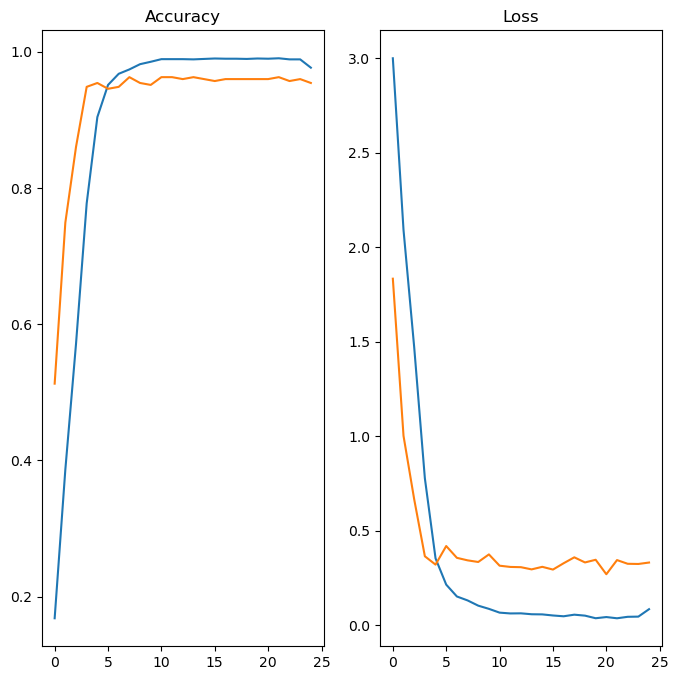

In [18]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [31]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [32]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [33]:
score = tf.nn.softmax(predict)

In [34]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 75.89


In [35]:
model.save('Image_classify.keras')